In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


In [119]:
import seaborn as sns

# READ CSV

In [310]:
# Read data from 2 files:
df_Rating = pd.read_csv('./ml-25m/ratings.csv',nrows=5000)
df_Movies = pd.read_csv('./ml-25m/movies.csv',nrows=5000)

In [311]:
df_Rating.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [312]:
df_Movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Merge data frame

In [313]:
df = df_Rating.merge(df_Movies,left_on='movieId',right_on='movieId')

In [314]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


# 11.1 Data Preparation

In [315]:
uq_users = np.unique(df['userId'])
len(uq_users)

33

In [316]:
uq_movies = np.unique(df['movieId'])
len(uq_movies)

1315

# Map to dict

In [317]:
dict_users = dict()
Index = 0 
for ids in sorted(uq_users):
    dict_users[ids] = Index
    Index +=1
len(dict_users)

33

In [318]:
dict_movie = dict()
Index = 0 
for ids in sorted(uq_movies):
    dict_movie[ids] = Index
    Index +=1
len(dict_movie)

1315

In [319]:
df['userId'] = df['userId'].map(dict_users)
df['movieId'] = df['movieId'].map(dict_movie)

In [320]:
df

,userId,movieId,rating,timestamp,title,genres
0,0,131,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,2,131,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,3,131,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,4,131,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,6,131,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
3129,30,1253,3.0,1256225952,"Accused, The (1988)",Drama
3130,30,1254,2.0,1256227111,Beaches (1988),Comedy|Drama|Musical
3131,30,1260,2.0,1256226289,Always (1989),Drama|Fantasy|Romance
3132,30,1264,1.5,1256226316,America's Sweethearts (2001),Comedy|Romance


In [321]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [322]:
df = df.dropna()

In [323]:
df

,userId,movieId,rating,timestamp,title,genres
0,0,131,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,2,131,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,3,131,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,4,131,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,6,131,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
3129,30,1253,3.0,1256225952,"Accused, The (1988)",Drama
3130,30,1254,2.0,1256227111,Beaches (1988),Comedy|Drama|Musical
3131,30,1260,2.0,1256226289,Always (1989),Drama|Fantasy|Romance
3132,30,1264,1.5,1256226316,America's Sweethearts (2001),Comedy|Romance


In [324]:
# drop unexpectation features
df =  df.drop(['timestamp','title','genres'],axis=1)

In [325]:
df.head(10)

,userId,movieId,rating
0,0,131,5.0
1,2,131,5.0
2,3,131,4.0
3,4,131,4.0
4,6,131,4.0
5,7,131,5.0
6,9,131,4.5
7,11,131,5.0
8,12,131,5.0
9,13,131,5.0


In [326]:
df["userId"].value_counts()

11    575
22    371
30    262
8     178
12    169
2     162
17    161
7     155
1     137
18    132
4     101
24     87
14     69
26     60
19     59
3      55
27     49
9      42
25     33
31     33
0      30
5      26
6      25
29     25
23     24
28     23
21     22
20     20
10     15
13     14
15     14
32      4
16      2
Name: userId, dtype: int64

# Preapare Train, validation data

In [327]:
train,validate = train_test_split(df,test_size=0.3,random_state=23, stratify=df.rating)

In [328]:
train

,userId,movieId,rating
1929,7,628,3.0
2460,11,769,4.5
2419,11,702,2.5
1240,30,1296,1.5
1272,22,471,5.0
...,...,...,...
3070,30,985,3.0
2790,30,424,3.0
642,12,861,4.5
786,11,1288,4.0


In [361]:
validate

,userId,movieId,rating
1511,26,257,2.0
3,4,131,4.0
1569,5,400,4.0
2879,22,937,4.0
941,11,393,4.0
...,...,...,...
1190,20,1212,5.0
407,3,436,3.0
1141,11,1140,1.5
302,8,255,3.0


In [363]:
validate.rating

1511    2.0
3       4.0
1569    4.0
2879    4.0
941     4.0
       ... 
1190    5.0
407     3.0
1141    1.5
302     3.0
2997    5.0
Name: rating, Length: 941, dtype: float64

# Model Preparation and Training

In [330]:
num_unique_users = len(uq_users)
num_unique_movies = len(uq_movies)

In [331]:
# Create Model NCF
EMBEDDING_SIZE=200
users_input = Input(shape=(1,), name="users_input")
users_embedding = Embedding(num_unique_users + 1, EMBEDDING_SIZE,
name="users_embeddings")(users_input)
users_bias = Embedding(num_unique_users + 1, 1, name="users_bias")(users_input)

movies_input = Input(shape=(1,), name="movies_input")
movies_embedding = Embedding(num_unique_movies + 1, EMBEDDING_SIZE,
name="movies_embeddings")(movies_input)
movies_bias = Embedding(num_unique_movies + 1, 1, name="movies_bias")(movies_input)

dot_product_users_movies = tf.math.multiply(users_embedding, movies_embedding)
input_terms = dot_product_users_movies + users_bias + movies_bias
input_terms = Flatten(name="fl_inputs")(input_terms)
output = Dense(3, activation="relu", name="output")(input_terms)

model = Model(inputs=[users_input, movies_input], outputs=output)

opt_adam = Adam(lr = 0.005)
model.compile(optimizer=opt_adam, loss= ['mse'], metrics=['mean_absolute_error'])

C:\Users\ACER-OAT\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [332]:
model.summary(expand_nested=True)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 users_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 movies_input (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 users_embeddings (Embedding)   (None, 1, 200)       6800        ['users_input[0][0]']            
                                                                                                  
 movies_embeddings (Embedding)  (None, 1, 200)       263200      ['movies_input[0][0]']           
                                                                                            

# Training 

In [380]:
# ------------ Training Model -------------------------------
BS = [64, 128, 256, 512, 1024, 2048] # try at least 3 values
EP = [5, 10, 20, 50, 60 ] # try at least 3 values
history = model.fit(x=[train.userId, train.movieId],y=train.rating,
    batch_size=256,
    epochs=20,
    verbose=0,
    validation_data=([validate.userId, validate.movieId], validate.rating)
)

In [381]:
measure = pd.DataFrame(history.history)

In [382]:
measure

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0.176756,0.277772,1.377666,0.923630
1,0.132795,0.231390,1.366091,0.917517
2,0.095076,0.190238,1.376250,0.921937
3,0.066124,0.151474,1.381245,0.922859
4,0.046048,0.121713,1.385113,0.924715
5,0.032207,0.099425,1.392225,0.928235
6,0.022075,0.080305,1.390781,0.927389
7,0.015982,0.066384,1.396915,0.929362
8,0.011492,0.054771,1.392878,0.927289
9,0.008298,0.046050,1.394968,0.928574


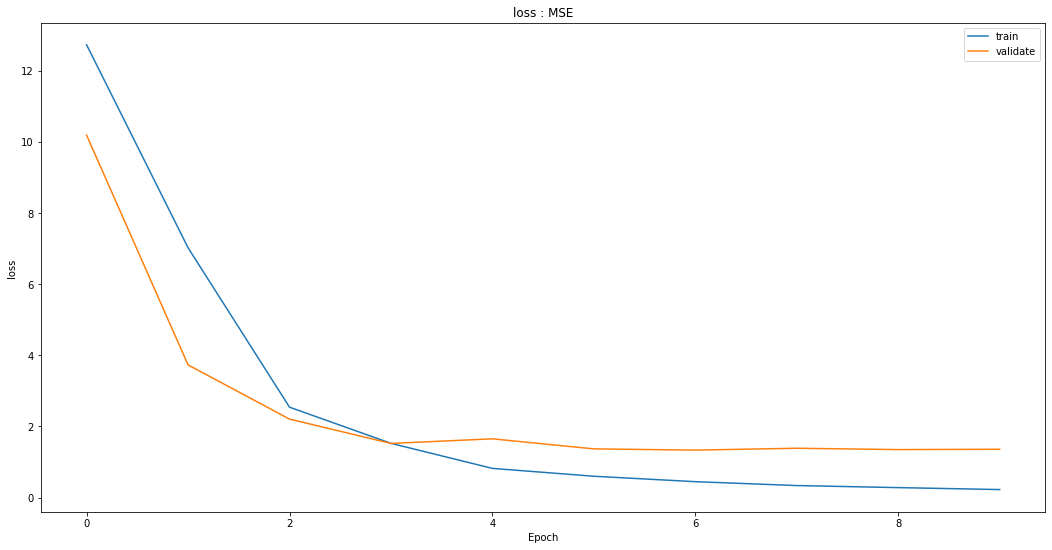

In [336]:
# ------------ Visualize loss -------------------------------
fig = plt.figure(figsize=(18,9))
plt.plot(history.history['loss'] ,label="train")
plt.plot(history.history['val_loss'],label="validate")
plt.legend(loc='upper right', frameon=True)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('loss : MSE')
plt.show()


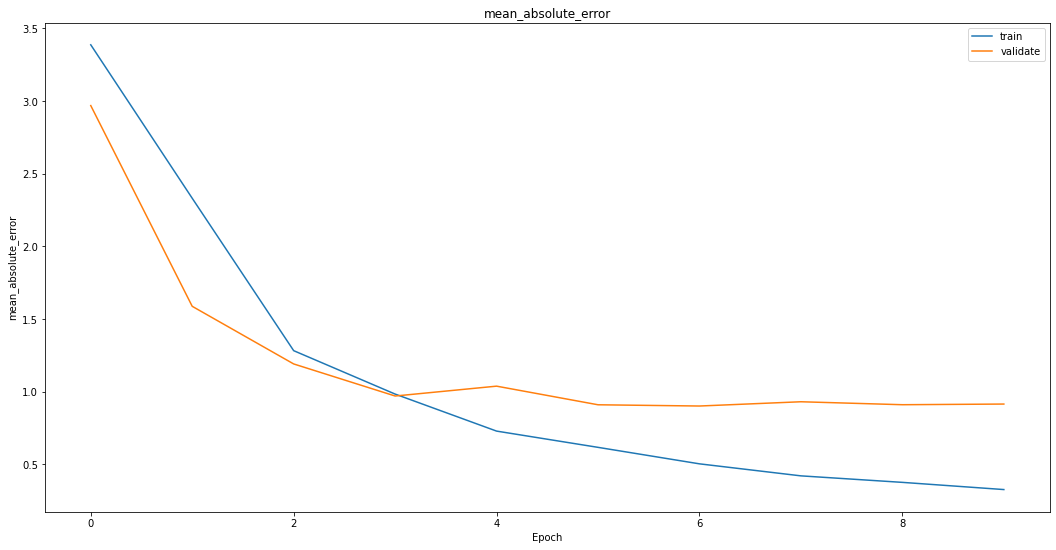

In [337]:
# ------------ Visualize loss -------------------------------
fig = plt.figure(figsize=(18,9))
plt.plot(history.history['mean_absolute_error'] ,label="train")
plt.plot(history.history['val_mean_absolute_error'],label="validate")
plt.legend(loc='upper right', frameon=True)
plt.xlabel('Epoch')
plt.ylabel('mean_absolute_error')
plt.title('mean_absolute_error')
plt.show()


In [338]:
userPredictR = pd.DataFrame(model.predict([validate.userId, validate.movieId]))

In [340]:
userPredictR

,0,1,2
0,3.963402,3.924036,3.990581
1,4.340548,4.361012,4.340902
2,4.398527,4.445365,4.424914
3,2.898500,2.936382,2.921612
4,3.778459,3.722937,3.803199
...,...,...,...
936,4.169912,4.164670,4.177776
937,4.248509,4.233086,4.262511
938,2.912831,2.952903,2.962846
939,4.248201,4.259790,4.231389


2       4.0
3       4.0
5       5.0
6       4.5
12      3.5
       ... 
3116    0.5
3117    2.0
3119    1.5
3128    2.5
3132    1.5
Name: rating, Length: 941, dtype: float64

In [341]:
userPredictR[0]

0      3.963402
1      4.340548
2      4.398527
3      2.898500
4      3.778459
         ...   
936    4.169912
937    4.248509
938    2.912831
939    4.248201
940    2.245449
Name: 0, Length: 941, dtype: float32

In [386]:
validate["rating"].reset_index()

,index,rating
0,1511,2.0
1,3,4.0
2,1569,4.0
3,2879,4.0
4,941,4.0
...,...,...
936,1190,5.0
937,407,3.0
938,1141,1.5
939,302,3.0


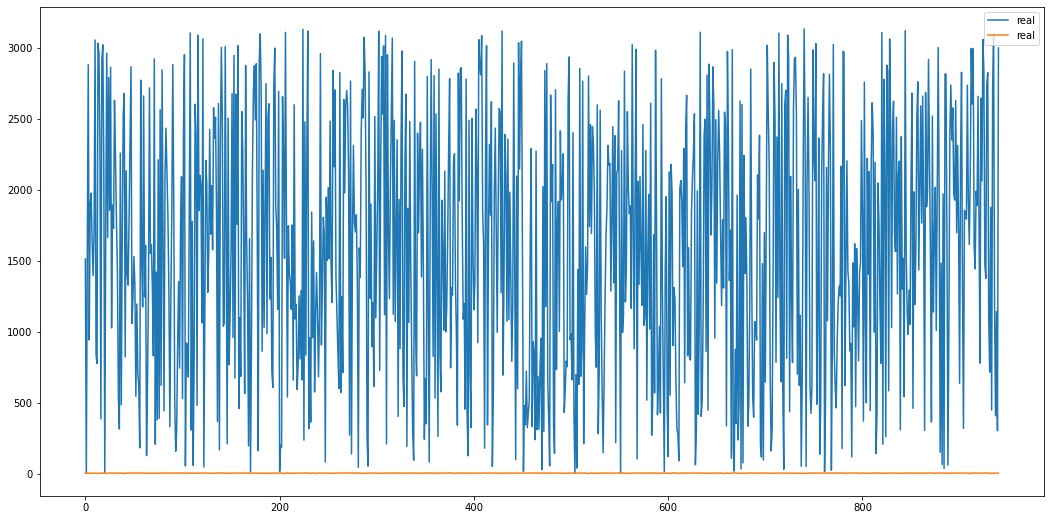

In [390]:
x = plt.figure(figsize=(18,9))
plt.plot(validate["rating"].reset_index() ,label="real")
plt.legend(loc='upper right', frameon=True)

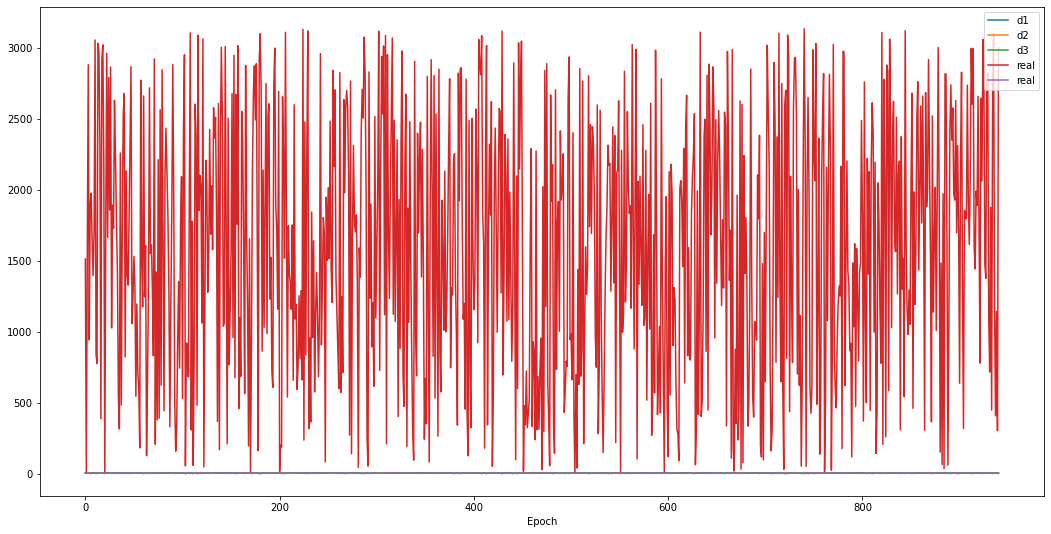

In [393]:
# ------------ Visualize loss -------------------------------
fig = plt.figure(figsize=(18,9))
plt.plot(userPredictR[0],label="d1")
plt.plot(userPredictR[1],label="d2")
plt.plot(userPredictR[2],label="d3")
plt.plot(validate["rating"].reset_index() ,label="real")
plt.legend(loc='upper right', frameon=True)
plt.xlabel('Epoch')
plt.show()


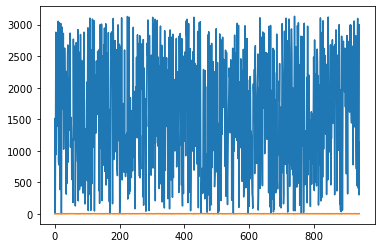